In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

Saving weather1.csv to weather1.csv


1. Загрузите данные из файла «weather1.csv» о погоде в Перми. Загрузите
только следующие столбцы:
a. Местное время в Перми
b.
T (температура воздуха в градусах Цельсия)
c.
P (атмосферное давление в мм.рт.ст.)
d.
U (относительная влажность в %)
e.
Ff (скорость ветра в м/с)
f.
N (облачность)
g.
H (высота основания облаков, м)
h.
VV (горизонтальная дальность видимости в км)

In [ ]:
weather = pd.read_csv('weather1.csv',
                      usecols=['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'],
                      delimiter=';')
print(weather)

     Местное время в Перми     T      P   U  Ff                          N  \
0         31.12.2021 23:00  -9.8  762.5  83   3                      100%.   
1         31.12.2021 20:00 -10.6  764.2  81   3                      100%.   
2         31.12.2021 17:00 -11.6  765.5  79   2  90  или более, но не 100%   
3         31.12.2021 14:00 -11.9  766.7  77   1                      100%.   
4         31.12.2021 11:00 -13.6  767.5  79   1                      100%.   
...                    ...   ...    ...  ..  ..                        ...   
2914      01.01.2021 14:00 -13.0  778.4  82   3                      100%.   
2915      01.01.2021 11:00 -12.9  778.4  80   4                      100%.   
2916      01.01.2021 08:00 -12.4  778.3  79   4                      100%.   
2917      01.01.2021 05:00 -12.3  778.7  80   4                      100%.   
2918      01.01.2021 02:00 -12.6  778.6  80   2                      100%.   

              H    VV  
0      600-1000   4.0  
1     1000-1500

2. Постройте точечную диаграмму (диаграмму рассеяния) по
признакам температуры и относительной влажности.

<Axes: xlabel='T', ylabel='U'>

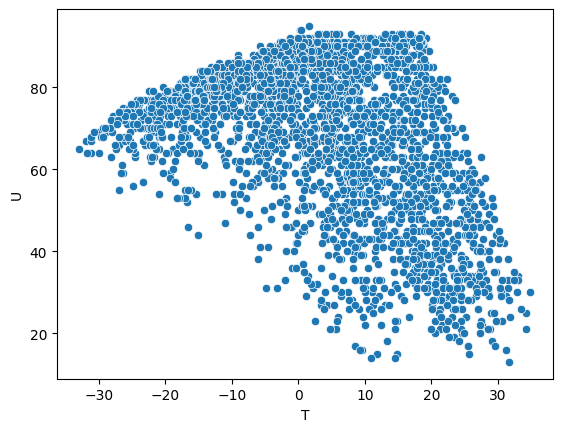

In [ ]:
sns.scatterplot(data=weather, x="T", y="U")

Text(0, 0.5, 'Влажность')

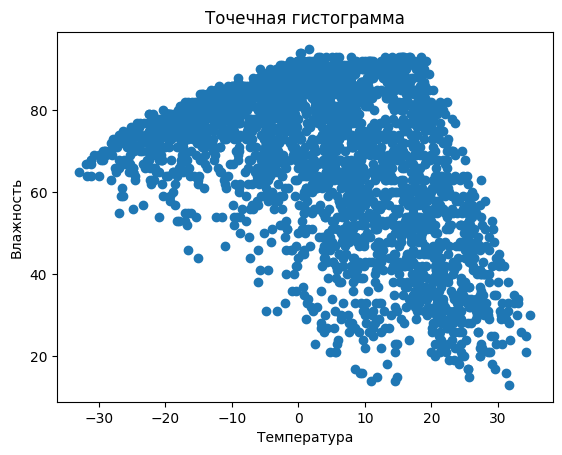

In [ ]:
plt.scatter(weather['T'], weather['U'])
plt.title('Точечная гистограмма')
plt.xlabel('Температура')
plt.ylabel('Влажность')

3. На построенной в предыдущем пункте диаграмме выделите
точки разными цветами в зависимости от облачности: синим – для
которых облачность составляет 100%; красным – все остальные.

<Axes: xlabel='T', ylabel='U'>

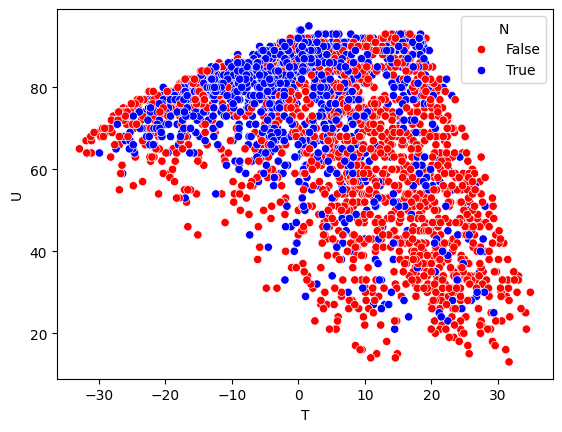

In [ ]:
sns.scatterplot(data=weather, x='T', y='U', hue=weather['N'] == "100%.",
                palette={True: 'blue', False: 'red'})

Text(0, 0.5, 'Относительная влажность, %')

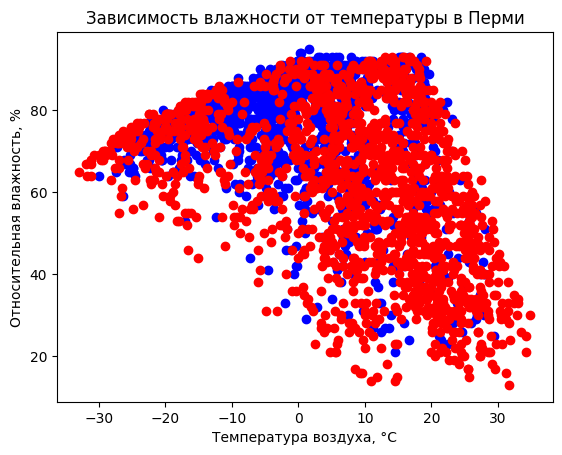

In [ ]:
plt.scatter(weather[weather['N'] == "100%."]['T'], weather[weather['N'] == "100%."]['U'],
            color='blue', label='Облачность 100%')

plt.scatter(weather[weather['N'] != "100%."]['T'], weather[weather['N'] != "100%."]['U'],
            color='red', label='Облачность <100%')

plt.title('Зависимость влажности от температуры в Перми')
plt.xlabel('Температура воздуха, °C')
plt.ylabel('Относительная влажность, %')

4. Постройте линейную диаграмму (график) изменения
температуры в зависимости от местного времени.

<Axes: xlabel='local_time', ylabel='T'>

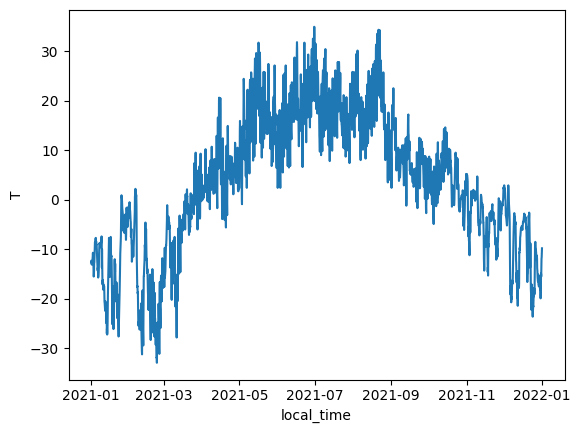

In [ ]:
weather['local_time'] = pd.to_datetime(weather['Местное время в Перми'], format='%d.%m.%Y %H:%M')
weather = weather.sort_values('local_time')

sns.lineplot(data=weather, x='local_time', y='T')

Text(0, 0.5, 'Температура воздуха, °C')

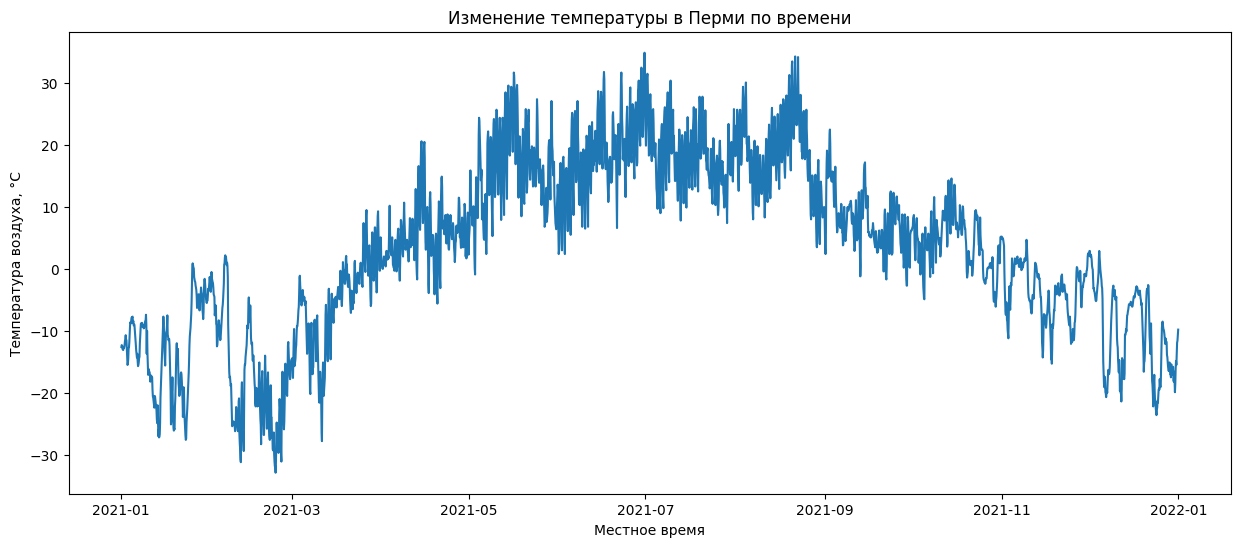

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(weather['local_time'], weather['T'])

plt.title('Изменение температуры в Перми по времени')
plt.xlabel('Местное время')
plt.ylabel('Температура воздуха, °C')

5. Посчитайте по имеющимся данным среднемесячную
температуру и постройте столбчатую диаграмму (вертикальную)
зависимости средней температуры от месяца. Подсказка: создайте
отдельный столбец с номером месяца (вычислив его из столбца
«Местное время»), а затем сгруппируйте данные по этому столбцу.

<Axes: xlabel='month'>

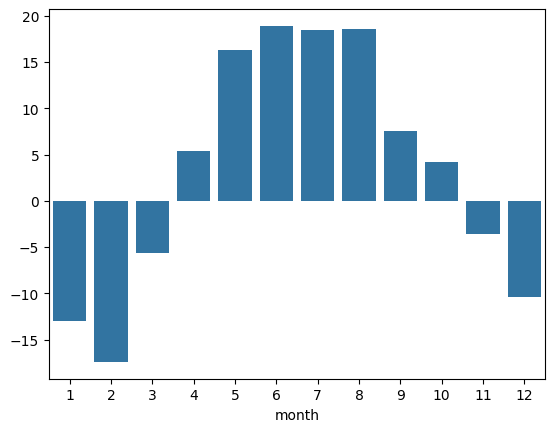

In [ ]:
weather['month'] = pd.to_datetime(weather['local_time']).dt.month

monthly_avg_temp = weather.groupby('month')['T'].mean()


sns.barplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)

([<matplotlib.axis.XTick at 0x7d86a1e5a420>,
 [Text(1, 0, 'Янв'),
  Text(2, 0, 'Фев'),
  Text(3, 0, 'Мар'),
  Text(4, 0, 'Апр'),
  Text(5, 0, 'Май'),
  Text(6, 0, 'Июн'),
  Text(7, 0, 'Июл'),
  Text(8, 0, 'Авг'),
  Text(9, 0, 'Сен'),
  Text(10, 0, 'Окт'),
  Text(11, 0, 'Ноя'),
  Text(12, 0, 'Дек')])

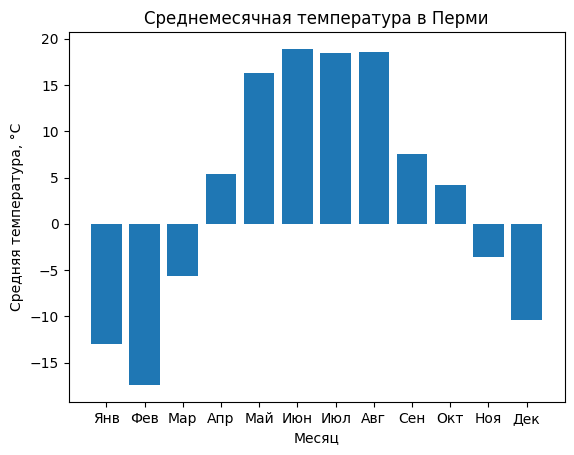

In [ ]:
plt.bar(monthly_avg_temp.index, monthly_avg_temp.values)

plt.title('Среднемесячная температура в Перми')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура, °C')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                         'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])

6. Постройте ленточную диаграмму (горизонтальную), отразив
на ней количество имеющихся наблюдений для каждого варианта
облачности.

<Axes: ylabel='N'>

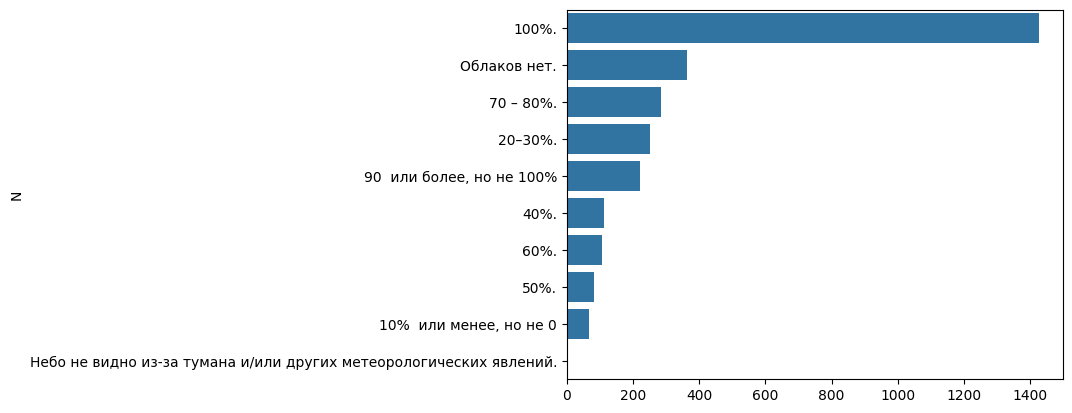

In [ ]:
cloud_counts = weather['N'].value_counts()

sns.barplot(x=cloud_counts.values, y=cloud_counts.index.astype(str))

Text(0, 0.5, 'Варианты облачности')

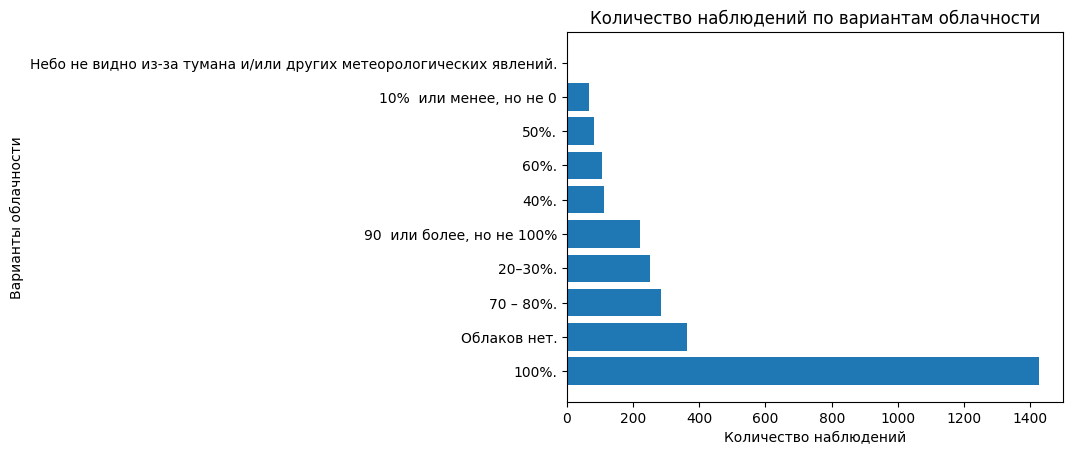

In [ ]:
plt.barh(cloud_counts.index.astype(str), cloud_counts.values)

plt.title('Количество наблюдений по вариантам облачности')
plt.xlabel('Количество наблюдений')
plt.ylabel('Варианты облачности')

7. Постройте гистограмму частот для температуры. На
гистограмме должно быть 10 диапазонов температуры.

<Axes: xlabel='T', ylabel='Count'>

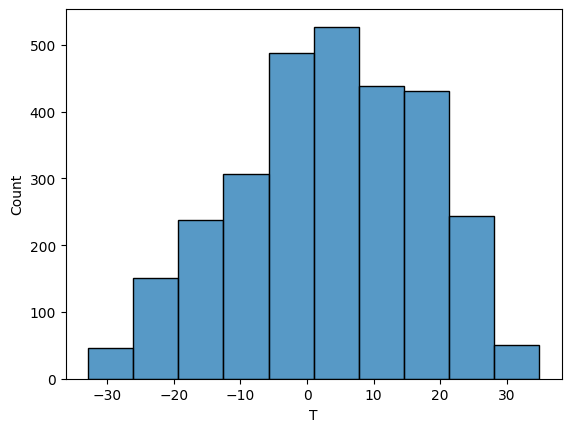

In [ ]:
sns.histplot(data=weather, x='T', bins=10)

Text(0, 0.5, 'Количество наблюдений')

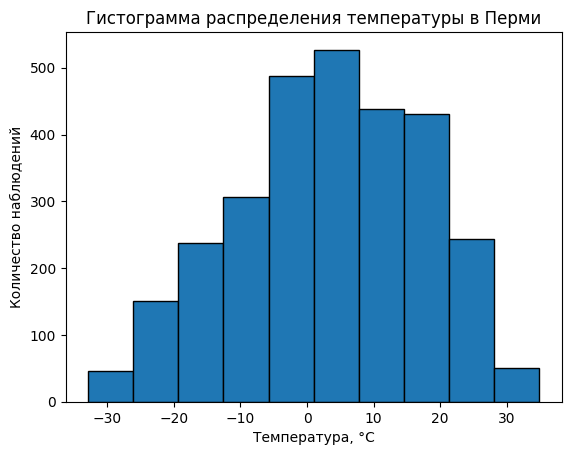

In [ ]:
plt.hist(weather['T'], bins=10, edgecolor='black')

plt.title('Гистограмма распределения температуры в Перми')
plt.xlabel('Температура, °C')
plt.ylabel('Количество наблюдений')

8. Разбейте данные на 3 группы по значению горизонтальной
дальности видимости (одна группа – дальность видимости менее 5 км,
вторая – от 5 до 15 км(включительно), третья – более 15 км). В одной
области для каждой группы постройте boxplot (диаграмму «ящик с
усами») для признака «атмосферное давление».

Text(0.5, 0.98, 'Распределение давления по категориям видимости')

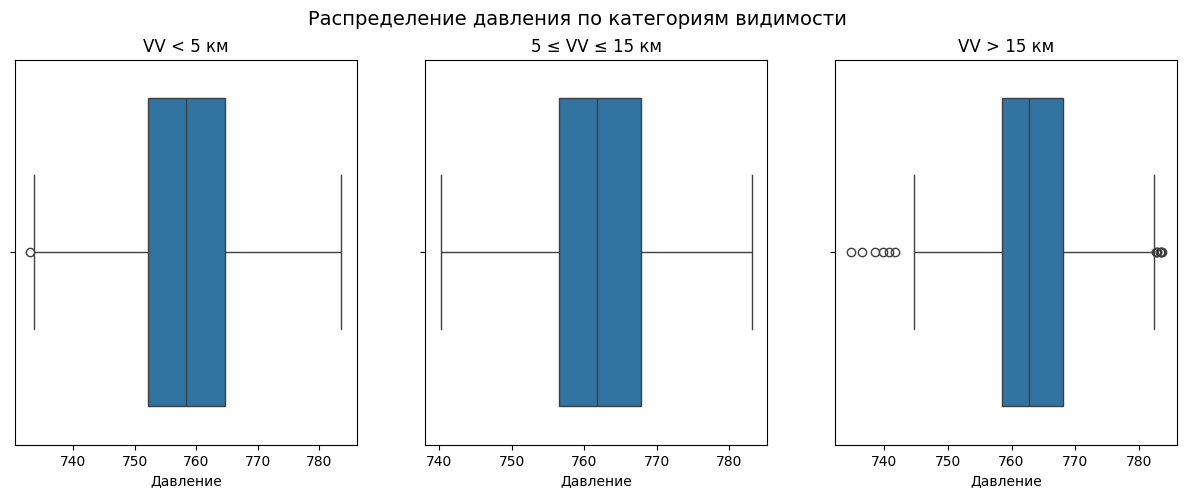

In [ ]:
less_than_5 = weather[weather['VV'] < 5].copy()
between_5_and_15 = weather.query('5 <= VV <= 15').copy()
more_than_15 = weather[weather['VV'] > 15].copy()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=less_than_5['P'], ax=axes[0])
axes[0].set_title('VV < 5 км')
axes[0].set_xlabel('Давление')

sns.boxplot(x=between_5_and_15['P'], ax=axes[1])
axes[1].set_title('5 ≤ VV ≤ 15 км')
axes[1].set_xlabel('Давление')

sns.boxplot(x=more_than_15['P'], ax=axes[2])
axes[2].set_title('VV > 15 км')
axes[2].set_xlabel('Давление')

plt.suptitle('Распределение давления по категориям видимости', fontsize=14)

9. (0.5 балла) Постройте круговую диаграмму для признака «высота
основания облаков».

([<matplotlib.patches.Wedge at 0x7d8694aedc40>,
 [Text(0.632566737475607, 0.8999218425171525, '600-1000'),
  Text(-0.9493372646758911, 0.5556606499453575, '1000-1500'),
  Text(-0.7650225969306099, -0.790405229098053, '2000-2500'),
  Text(0.3184621484703823, -1.0528921407207998, '2500 или более, или облаков нет.'),
  Text(0.9692137603063969, -0.5202160001698664, '300-600'),
  Text(1.096257622154599, -0.09065994632661521, '200-300'),
  Text(1.0998798809403825, -0.01625569139011151, '100-200')])

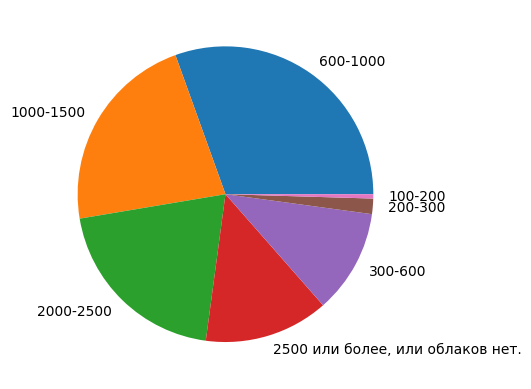

In [ ]:
cloud_height_counts = weather['H'].value_counts()
fig, ax = plt.subplots()
ax.pie(cloud_height_counts.values, labels=cloud_height_counts.index)